In [1]:
import numpy as np
from PIL import Image
import pandas as pd
from sklearn.model_selection import train_test_split

In [6]:
#Re-Load the dataset
#loaded_data = np.load("my_dataset_2.npz", allow_pickle=True)
loaded_data = pd.read_csv('/Users/veronicalarsson/Downloads/model_data_100x100.csv')

# Access images and labels
#loaded_images = loaded_data['images']

# Now you can use loaded_images and loaded_labels in your code
#image_df=pd.DataFrame(loaded_images)
images_full = loaded_data
images_full


,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,...,Pixel_9991,Pixel_9992,Pixel_9993,Pixel_9994,Pixel_9995,Pixel_9996,Pixel_9997,Pixel_9998,Pixel_9999,Label_Encoded
0,0.307692,0.299595,0.376518,0.360324,0.287449,0.425101,0.315789,0.267206,0.408907,0.445344,...,0.331984,0.319838,0.315789,0.283401,0.129555,0.129555,0.141700,0.117409,0.246964,18
1,0.307692,0.299595,0.376518,0.360324,0.287449,0.425101,0.315789,0.267206,0.408907,0.445344,...,0.331984,0.319838,0.315789,0.283401,0.129555,0.129555,0.141700,0.117409,0.246964,18
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18
4,0.306122,0.297959,0.367347,0.363265,0.306122,0.400000,0.322449,0.277551,0.400000,0.440816,...,0.334694,0.322449,0.318367,0.273469,0.142857,0.126531,0.134694,0.134694,0.240816,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4054,0.011765,0.011765,0.011765,0.015686,0.015686,0.015686,0.011765,0.015686,0.015686,0.015686,...,0.039216,0.031373,0.035294,0.019608,0.019608,0.019608,0.019608,0.019608,0.023529,22
4055,0.011765,0.011765,0.011765,0.015686,0.015686,0.015686,0.011765,0.015686,0.015686,0.015686,...,0.039216,0.031373,0.035294,0.019608,0.019608,0.019608,0.019608,0.019608,0.023529,22
4056,0.011765,0.011765,0.011765,0.015686,0.015686,0.015686,0.011765,0.015686,0.015686,0.015686,...,0.039216,0.031373,0.035294,0.019608,0.019608,0.019608,0.019608,0.019608,0.023529,22
4057,0.011765,0.011765,0.011765,0.015686,0.015686,0.015686,0.011765,0.015686,0.015686,0.015686,...,0.039216,0.031373,0.035294,0.019608,0.019608,0.019608,0.019608,0.019608,0.023529,22


In [11]:
#load info about images
#images_info=pd.read_csv(r"C:\Users\EmiliaGachowetz-Gepp\Documents\New ML\unzipped\flickr_logos_27_dataset\flickr_logos_27_dataset_training_set_annotation.txt", sep='\s+', header=None)
#renaming the columns correspondingly:
#new_column_names = ['Image ID', 'Label', 'Subset', 'x1', 'y1','x2', 'y2']
#images_info.columns=new_column_names

#merged_df = pd.merge(image_df, images_info, left_on=51529, right_on='Image ID', how='inner')
#images_full=merged_df.drop(51529, axis=1)

#split it into features and labels
features = images_full.drop(columns = {'Label_Encoded'})
labels = images_full[['Label_Encoded']]

In [13]:
#split into 80% training+validation files+labels, and 20 % test files+labels
X_train ,X_test, y_train, y_test=train_test_split(features, labels, test_size=0.2, random_state=42)

X_train=X_train/255.0
X_test=X_test/255.0

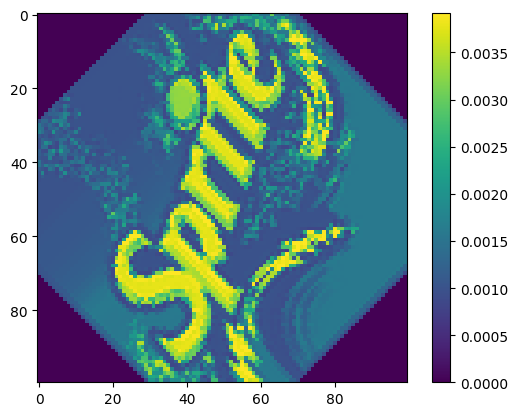

In [44]:
import matplotlib.pyplot as plt

#just plot one image to check if the pixels get stacked correctly
one_pic = X_train.iloc[100]
one_pic_array = one_pic.values.astype(float)  # Convert to float
one_pic_image = one_pic_array.reshape((100, 100))

plt.figure()
plt.imshow(one_pic_image)
plt.colorbar()
plt.grid(False)
plt.show()

In [17]:
def image_reshape(image_df):
    images = []
    for idx, row in image_df.iterrows():
        one_pic_array = row.values.astype(float)
        one_pic_image = one_pic_array.reshape((100, 100))
        images.append(one_pic_image)
    return np.array(images)

reshaped_images = image_reshape(X_train)
reshaped_images.shape

(3247, 100, 100)

In [45]:
X_train_reshaped = np.array(reshaped_images, dtype=np.float32)
y_train=np.array(y_train, dtype=np.float32)

# Reshape the input images to include the channel dimension
reshaped_images_array = np.expand_dims(X_train_reshaped, axis=-1)
reshaped_images_array = np.tile(reshaped_images_array, (1, 1, 1, 3))
reshaped_images_array.shape


(3247, 100, 100, 3)

In [48]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D, Dense, BatchNormalization

cnn_model_1 = Sequential()

# Convolutional layers with Batch Normalization
cnn_model_1.add(Conv2D(kernel_size=(3, 3), filters=64, input_shape=(100, 100, 3), activation='relu'))
cnn_model_1.add(BatchNormalization())
cnn_model_1.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model_1.add(Conv2D(kernel_size=(3, 3), filters=128, activation='relu'))
cnn_model_1.add(BatchNormalization())
cnn_model_1.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model_1.add(Conv2D(kernel_size=(3, 3), filters=256, activation='relu'))
cnn_model_1.add(BatchNormalization())
cnn_model_1.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout layer
cnn_model_1.add(Dropout(0.5))

# Global average pooling layer
cnn_model_1.add(GlobalAveragePooling2D())

# Output layer
cnn_model_1.add(Dense(27, activation='softmax'))

cnn_model_1.summary()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 98, 98, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 98, 98, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 47, 47, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 47, 47, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 21, 21, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 21, 21, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_8      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 27)             │         6,939 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 379,547 (1.45 MB)

 Trainable params: 378,651 (1.44 MB)

 Non-trainable params: 896 (3.50 KB)

In [49]:
#Compile the model 
cnn_model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Train the model for 100 epochs
H = cnn_model_1.fit(reshaped_images_array, y_train, epochs=5)

#After training, load the model with the minimal error on the validation set
#cnn_model.load_weights('saved_keras_models/weights.best.CNN.hdf5')

Epoch 1/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 44s 419ms/step - accuracy: 0.3034 - loss: 2.6318
Epoch 2/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 42s 415ms/step - accuracy: 0.5316 - loss: 1.6916
Epoch 3/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 42s 415ms/step - accuracy: 0.7259 - loss: 1.1251
Epoch 4/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 44s 427ms/step - accuracy: 0.8518 - loss: 0.7385
Epoch 5/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 42s 416ms/step - accuracy: 0.9191 - loss: 0.4845


https://medium.com/twodigits/classifying-logos-in-images-with-convolutionary-neural-networks-cnns-in-keras-21f02fcea5c2

In [51]:
reshaped_test_images = image_reshape(X_test)
X_test_reshaped = np.array(reshaped_test_images, dtype=np.float32)
y_test=np.array(y_test, dtype=np.float32)

# Reshape the input images to include the channel dimension
reshaped_images_test = np.expand_dims(X_test_reshaped, axis=-1)
reshaped_images_test = np.tile(reshaped_images_test, (1, 1, 1, 3))

cnn_model_1.evaluate(reshaped_images_test, y_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.0142 - loss: 3.3863


[3.4061126708984375, 0.009852216579020023]